# Data Wrangling and EDA with pandas
# Part 1: Identifying data problems commonly seen in practice

In practice, the data we acquire is often far from the data we hope for. Raw data can and usually have many problems that prevent us from using it for effective (or even barely meaningful) modeling and analysis. For example, recall that the Titanic dataset contains problematic text columns and missing values, and the LendingClub dataset is too unbalanced to use. **Data wrangling** is thus necessary in almost all practical cases of analytics.

Data wrangling is
+ “the art of getting your data into a useful form for visualization and modeling.” – from book <a href="https://r4ds.had.co.nz/"> “R for Data Science” </a>
+ “transforming and mapping data from one ‘raw’ data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.” -- [Wikipedia](https://en.wikipedia.org/wiki/Data_wrangling)

In this lecture (and Homework 1 afterwards), we will practice data wrangling over three datasets: ***the Titanic dataset, the LendingClub dataset, and the (new to the class) KDD98 dataset***. We will also conduct **Exploratory Data Analysis (EDA)** along the way.

## pandas skills required before you proceed

In Python, effective data wrangling requires us to have a good working knowledge of the `pandas` package. In the previous lecture (note: in Fall 2021 this is through datacamp.com assignment 2 "Data Manipulation with pandas"), we have acquired the following pandas skills:
+ loading and saving a pandas DataFrame
+ index, columns, values
+ selecting an element or a subset via df.loc[] or df.iloc[]
+ boolean mask and boolean selection
+ modifying and adding elements/rows/columns, and the concept of broadcasting
+ sorting, aggregation, summary statistics

You should NOT proceed with this lecture before you've acquired the above skills!
+ That said, nobody will master all the above skills in the first try. Repeated practices, such as the application of these skills onto today's two datasets (and then onto the new Homework 1 dataset), is the key to effective learning. 
+ I provided two concise lecture notes: **PandasSeries_filled.ipynb** and **PandasDataFrame_filled.ipynb**. These files help you quickly review and practice the above pandas skills whenever needed. 
  + They also help you prepare for exams.

## Data problems commonly seen in practice

Let us see what the common data programs are by going through the three datasets.

### Data problems in the Titanic dataset

In [1]:
import numpy as np
import pandas as pd

# By default pandas will curb the number of columns displayed on screen, 
# which is a bit annoying for large datasets. Do this to avoid the curbing:
pd.set_option('max_columns', 100)

df = pd.read_csv('titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Discussion: what data problems do you spot in the Titanic dataset?

Placeholder for (possible) issues with this dataset:
+ missing values
+ to impute Age (with average) and Embarked (with mode)
+ to remove Cabin
+ to drop PassengerID (index not useful for supervised learning), Ticket
+ to extract marriage status from Name
+ to convert Sex from female/male to 0/1

Especially when the data size is large, we will need to use **Exploratory Data Analysis (EDA)** to identify hard-to-visually-spot data issues. For example, we can do the following simple summary to detect all missing value problems:

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's check if the dataset is balanced by counting the unique values of the target variable:

In [10]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In Part 2 of this lecture (in a separate file), we will address the data problems we just found in the Titanic dataset. But for now, let's move on to the other two datasets and see what data problems they have. 

### Data problems in the LendingClub dataset

In [11]:
lc = pd.read_csv('LendingClub.csv')
lc.head(10)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


How many records in this dataset?

In [12]:
lc.shape

(9578, 14)

Any missing values?

In [13]:
lc.isna().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

Is the dataset balanced?

In [14]:
lc.not_fully_paid.value_counts()
#unbalanced

0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [15]:
lc.not_fully_paid.mean()

0.16005429108373356

#### Discussion: what data problems do you spot in the LendingClub dataset?

+ ...
+ ...

This dataset is much larger than the Titanic dataset (how do we know?), therefore it is even harder for us to spot issues with bare eyes. Let's try more **EDA** here -- specifically, summary statistics -- to see if we can identify more data issues.

Try to use the `DataFrame.describe()` method to get the summary statistics. 

In [16]:
lc.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Furthermore, suppose we only care about mean and std, please try to show ONLY these two statistics.

In [17]:
lc.describe().loc[['mean','std']]

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,16913.963876,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,33756.189557,29.014417,2.200245,0.546215,0.262126,0.366676


Is the data across the columns of (very) different scales? Does it bother you?
+ Not good for learning algorithms that are distance based (e.g., KNN), or neural network based
+ Not good whenever L1 or L2 regularization is used (to discuss later)
+ Solutions: [rescaling/normalization/standardization](https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html) (we'll try them shortly)

In addition to solutions listed above, in statistics, we sometimes also use log transformation. Log transformation accomplishes two things at the same time: it scales down a data column, and it reduces the skewness of the data column. Let's check whether any column is significantly skewed (<-2 or >2, *roughly*):
+ Note: this does NOT apply to binary variables

In [18]:
lc.skew()

C:\Users\monas\AppData\Local\Temp/ipykernel_25392/740676767.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lc.skew()


credit_policy        -1.539621
int_rate              0.164420
installment           0.912522
log_annual_inc        0.028668
dti                   0.023941
fico                  0.471260
days_with_cr_line     1.155748
revol_bal            11.161058
revol_util            0.059985
inq_last_6mths        3.584151
delinq_2yrs           6.061793
pub_rec               5.126434
not_fully_paid        1.854592
dtype: float64

Alternatively, we can also use visual EDA to inspect possible skewness of some data columns. In Python, a popular package for data visualization is the [matplotlib package](https://matplotlib.org/stable/tutorials/introductory/pyplot.html). Thanks to the close integration between pandas and matplotlib, we can do [many plotting with simple code](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).
+ visualization is not required in this course EXCEPT for codes/exercises in the lectures.

In [19]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

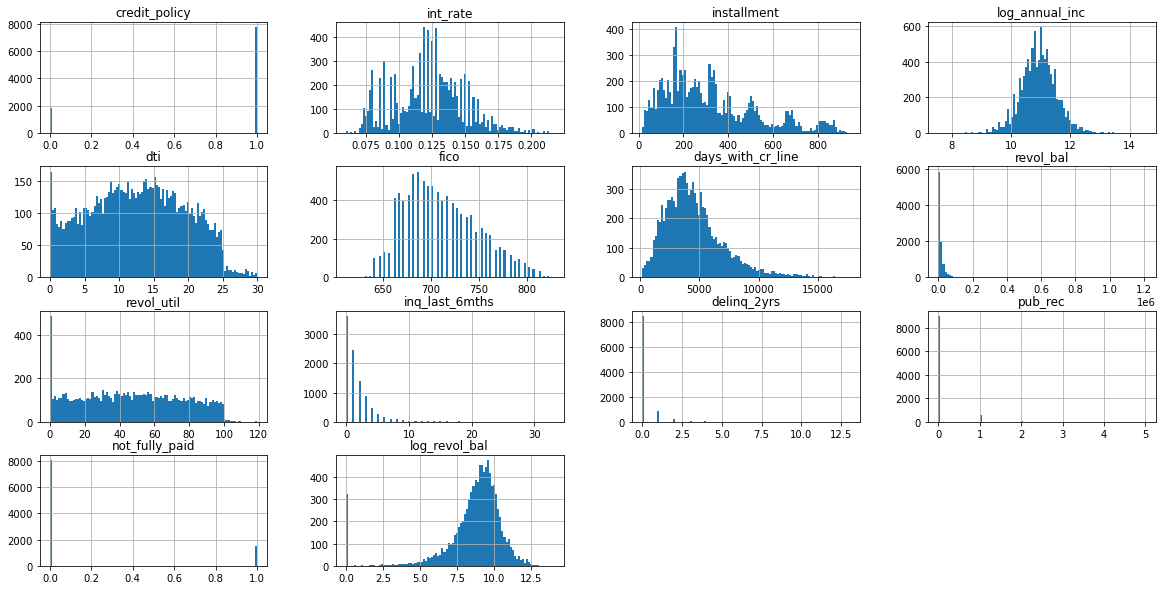

In [26]:
plt.figure()
lc.hist(bins=100, figsize=[20,10])
plt.show()

In [23]:
lc['log_revol_bal'] =np.log(lc.revol_bal+1)
lc['log_revol_bal']

0       10.270039
1       10.422995
2        8.163941
3       10.424303
4        8.464003
          ...    
9573    12.280127
9574     5.220356
9575     9.214034
9576     0.000000
9577    10.542179
Name: log_revol_bal, Length: 9578, dtype: float64

In [25]:
lc.skew()

C:\Users\monas\AppData\Local\Temp/ipykernel_25392/740676767.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lc.skew()


credit_policy        -1.539621
int_rate              0.164420
installment           0.912522
log_annual_inc        0.028668
dti                   0.023941
fico                  0.471260
days_with_cr_line     1.155748
revol_bal            11.161058
revol_util            0.059985
inq_last_6mths        3.584151
delinq_2yrs           6.061793
pub_rec               5.126434
not_fully_paid        1.854592
log_revol_bal        -2.213951
dtype: float64

As we found, the LendingClub dataset appears to have only a small number of data issues: data is unbalanced, one column needs to be converted to dummies, and possible need for data rescaling. You will work on some of these identified problems in Homework 1.

### Data problems in the KDD98 dataset

Let's try one more dataset, the KDD 98 dataset in file "KDD98.csv". See file "KDD98 dataset description.pdf" for a description of the context of this dataset, and meanings of every column. This time, you are in charge of coding. Please write code to:
+ load the dataset, and do a quick glance of the first few records
+ produce and glance through the summary statistics
+ produce and inspect the histograms
+ check for missing values
+ write down the data problems that you identified
  + (If the professor asks you to join group discussion) Each group write down the data problems, and then post them into the chat area of Zoom

In [27]:
kd = pd.read_csv('KDD98.csv')
kd.head(10)

,ID,TargetB,TargetD,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemMedIncome,DemPctVeterans,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftAvgLast,GiftTimeFirst,GiftTimeLast,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll
0,14974,0,NaN,0,NaN,F,U,0,0,0,2,4,1,3,13.50,9.25,17.00,17.0,66,21,8,17,26,3,8,13,A,0
1,6294,0,NaN,23,67.0,F,U,186800,0,85,1,8,0,3,20.00,15.88,NaN,20.0,92,26,14,35,79,5,5,24,A,0
2,46110,1,4.0,0,NaN,M,U,87600,38750,36,6,41,3,20,5.17,3.73,5.00,6.0,111,18,12,23,51,5,11,22,S,1
3,185937,1,10.0,0,NaN,M,U,139200,38942,27,3,12,3,8,8.67,8.50,8.67,10.0,93,9,14,22,44,2,6,16,E,1
4,29637,0,NaN,35,53.0,M,U,168100,71509,37,1,1,1,1,20.00,20.00,20.00,20.0,21,21,10,15,13,4,7,6,F,0
5,112632,1,11.0,0,47.0,M,H,253100,92514,0,3,11,2,9,10.33,8.27,8.00,11.0,102,22,11,21,45,5,10,22,S,1
6,123712,0,NaN,35,58.0,M,H,234700,72868,22,2,4,2,3,20.00,13.00,20.00,15.0,57,17,13,34,44,6,16,18,A,0
7,45409,0,NaN,8,NaN,U,U,207000,0,44,1,4,0,3,15.00,11.50,NaN,15.0,90,18,10,19,40,4,4,15,A,0
8,19094,1,40.0,35,NaN,F,U,137300,0,32,1,3,0,1,35.00,28.33,NaN,35.0,44,17,15,32,56,6,6,22,A,0
9,178271,0,NaN,13,NaN,U,U,180700,0,37,1,5,1,2,20.00,11.60,20.00,6.0,78,18,14,28,50,5,11,18,A,0


#### Discussion: what data problems do you spot in the KDD98 dataset?

+ ...
+ ...

**EDA and data wrangling are often hard to do right, and very time consuming in practice.** We often discover hard-to-spot problems in the data only after playing with it a lot, and sometimes just by luck. For example, suppose that we are curious whether the following two columns are positively correlated: DemMedIncome and DemMedHomeValue. We can check it either by calculating the value of correlation:

In [28]:
kd[['DemMedIncome','DemMedHomeValue']].corr()

,DemMedIncome,DemMedHomeValue
DemMedIncome,1.000000,0.318881
DemMedHomeValue,0.318881,1.000000


Or by scatter plot:

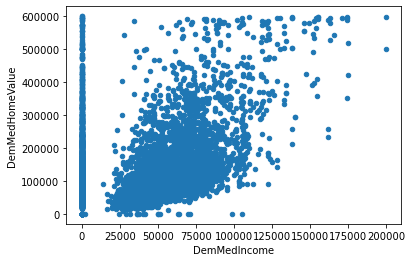

In [32]:
kd.plot.scatter(x='DemMedIncome', y='DemMedHomeValue')
plt.show()

*But wait -- why so many points are concentrated on the left side of the above scatter plot?* To investigate, please first plot a histogram of DemMedIncome with option bins=100:

<AxesSubplot:>

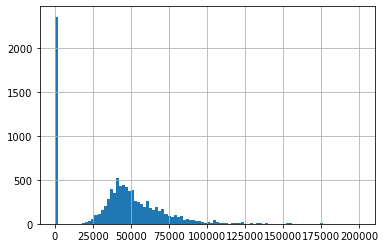

In [33]:
kd.DemMedIncome.hist(bins=100)

Next, please calculate the percentage of records where kd.DemMedIncome==0 :

In [35]:
kd[kd.DemMedIncome==0].shape[0]/kd.shape[0]

0.24334090439810035

What did we just find out? And what should we do with the data accordingly?
+ ...

This KDD98 dataset appears to be the most challenging one among the three we discussed in terms of the need for data wrangling. In Part 3 of this lecture (in a separate file), we will address a few of the identified data issues, and leave the rest to your Homework 1. 